<a href="https://colab.research.google.com/github/ykro/ML-SP1-2021/blob/main/L3N3_Evaluate%26Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

#dark theme
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

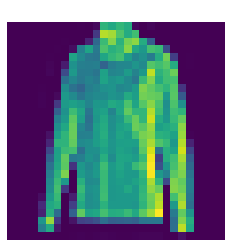

In [5]:
index = np.random.randint(train_images.shape[0])

plt.imshow(train_images[index])
plt.title(class_names[train_labels[index]])
plt.axis('off')
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images.max(), train_images.min()

(1.0, 0.0)

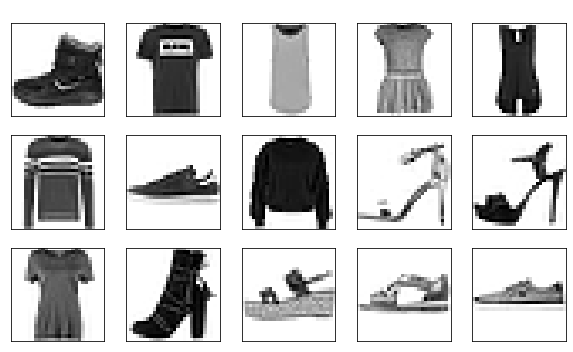

In [7]:
plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[i]])
plt.show()

In [8]:
epochs = 20
batch_size = 120
validation_split = 0.2

In [9]:
train_images[0].shape

(28, 28)

In [10]:
len(class_names)

10

In [11]:
model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(512, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')                  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(train_images, train_labels,
                    epochs=epochs,
                    validation_split=validation_split,
                    batch_size=batch_size)

Epoch 1/20
400/400 [==============================] - 3s 3ms/step - loss: 0.6773 - accuracy: 0.7637 - val_loss: 0.4042 - val_accuracy: 0.8549
Epoch 2/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3753 - accuracy: 0.8662 - val_loss: 0.3746 - val_accuracy: 0.8593
Epoch 3/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.8781 - val_loss: 0.3400 - val_accuracy: 0.8764
Epoch 4/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3110 - accuracy: 0.8872 - val_loss: 0.3663 - val_accuracy: 0.8668
Epoch 5/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2909 - accuracy: 0.8932 - val_loss: 0.3178 - val_accuracy: 0.8844
Epoch 6/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.9005 - val_loss: 0.3368 - val_accuracy: 0.8828
Epoch 7/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2599 - accuracy: 0.9025 - val_loss: 0.3287 - val_accuracy: 0.8792
Epoch 

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=3)
print(f'Loss:{test_loss}')
print(f'Accuracy:{test_acc}')

Loss:0.35228028893470764
Accuracy:0.8884000182151794


In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

acc

[0.8174791932106018,
 0.8651250004768372,
 0.8777291774749756,
 0.8879166841506958,
 0.8930000066757202,
 0.8992083072662354,
 0.9023333191871643,
 0.9067708253860474,
 0.9104999899864197,
 0.9136250019073486,
 0.9179166555404663,
 0.9205833077430725,
 0.9241041541099548,
 0.9257500171661377,
 0.929354190826416,
 0.9322500228881836,
 0.9331250190734863,
 0.9357916712760925,
 0.937833309173584,
 0.9388541579246521]

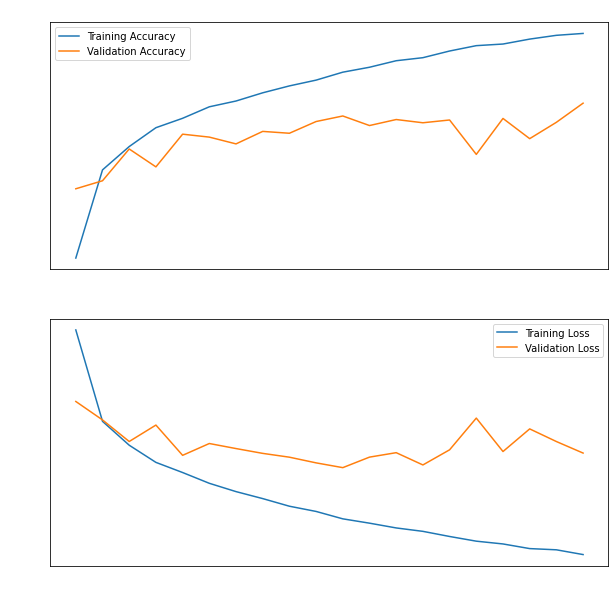

In [18]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_class = np.argmax(model.predict(test_images), axis=1)

cf_matrix = confusion_matrix(test_labels, y_pred_class)

print(f'Confusion Matrix\n{cf_matrix}')

report = classification_report(test_labels, 
                               y_pred_class, 
                               target_names=class_names)
print(f'Classification Report\n{report}')

Confusion Matrix
[[866   3  25   6   6   1  90   0   3   0]
 [  6 976   1  11   3   0   2   0   1   0]
 [ 18   0 797   9 103   0  72   0   1   0]
 [ 43   6  22 841  57   0  28   0   3   0]
 [  1   0  76  13 851   0  58   0   1   0]
 [  0   0   0   1   0 964   0  22   1  12]
 [129   0  82  16  70   1 693   0   9   0]
 [  0   0   0   0   0   8   0 982   1   9]
 [  5   0   4   2   7   2   2   4 974   0]
 [  0   0   0   0   0   5   1  54   0 940]]
Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.87      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.79      0.80      0.79      1000
       Dress       0.94      0.84      0.89      1000
        Coat       0.78      0.85      0.81      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.73      0.69      0.71      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.98      0.97      0.98

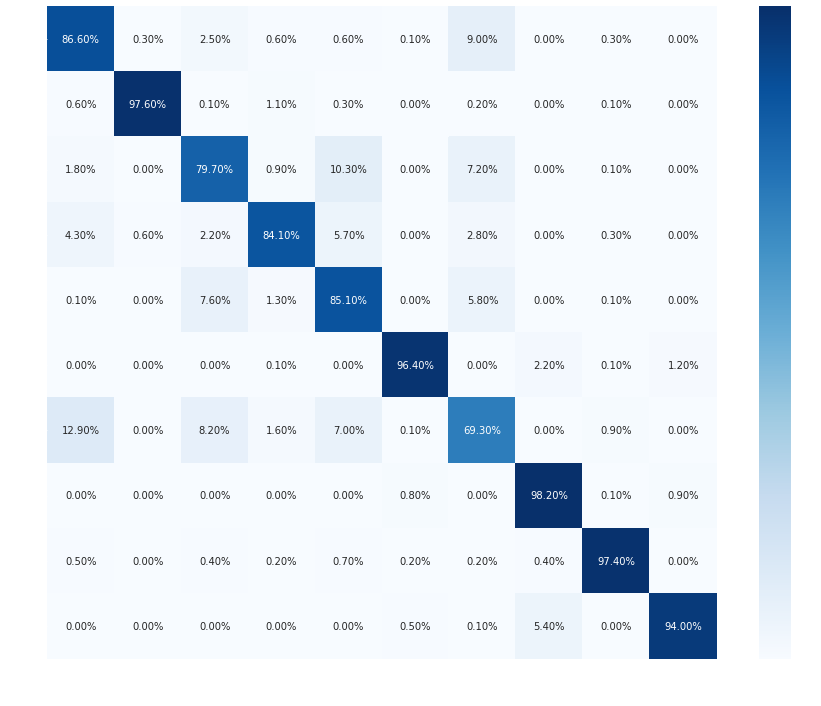

In [23]:
import seaborn as sns

plt.figure(figsize=(15,12))
ax = sns.heatmap(cf_matrix/(np.sum(cf_matrix)/len(cf_matrix)), annot=True, 
            fmt='.2%', cmap='Blues',
            yticklabels=class_names, 
            xticklabels=class_names)

ax.set_xlabel('Predicted label', fontsize=20)
ax.set_ylabel('True label', fontsize=20)

plt.show()